In [1]:
import os
import random
import shutil
import tensorflow as tf
from google.colab import drive
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
# Mount Google Drive
gdrive = "/content/drive/"
drive.mount(gdrive)

# Akses folder Data
dataset = os.path.join(gdrive, "Shareddrives/Capstone Bangkit/ML/Dataset")
trainset = os.path.join(dataset, "train")
testset = os.path.join(dataset, "test")

# Directory with our training cat pictures
train_0_dir = os.path.join(trainset, '0')

# Directory with our training dog pictures
train_1_dir = os.path.join(trainset, '1')

# Directory with our training cat pictures
train_2_dir = os.path.join(trainset, '2')

# Directory with our training dog pictures
train_3_dir = os.path.join(trainset, '3')

# Directory with our training cat pictures
train_4_dir = os.path.join(trainset, '4')

# Directory with our training dog pictures
train_5_dir = os.path.join(trainset, '5')

# Directory with our training cat pictures
train_6_dir = os.path.join(trainset, '6')

# Directory with our training dog pictures
train_7_dir = os.path.join(trainset, '7')

# Directory with our training cat pictures
train_8_dir = os.path.join(trainset, '8')

# Directory with our training dog pictures
train_9_dir = os.path.join(trainset, '9')

# Directory with our training cat pictures
train_ba_dir = os.path.join(trainset, 'ba')

# Directory with our training dog pictures
train_ca_dir = os.path.join(trainset, 'ca')

# Directory with our training cat pictures
train_da_dir = os.path.join(trainset, 'da')

# Directory with our training dog pictures
train_dha_dir = os.path.join(trainset, 'dha')

# Directory with our training cat pictures
train_ga_dir = os.path.join(trainset, 'ga')

# Directory with our training dog pictures
train_ha_dir = os.path.join(trainset, 'ha')

# Directory with our training cat pictures
train_ja_dir = os.path.join(trainset, 'ja')

# Directory with our training dog pictures
train_ka_dir = os.path.join(trainset, 'ka')

# Directory with our training cat pictures
train_la_dir = os.path.join(trainset, 'la')

# Directory with our training dog pictures
train_ma_dir = os.path.join(trainset, 'ma')

# Directory with our training cat pictures
train_na_dir = os.path.join(trainset, 'na')

# Directory with our training dog pictures
train_nga_dir = os.path.join(trainset, 'nga')

# Directory with our training cat pictures
train_nya_dir = os.path.join(trainset, 'nya')

# Directory with our training dog pictures
train_pa_dir = os.path.join(trainset, 'pa')

# Directory with our training cat pictures
train_ra_dir = os.path.join(trainset, 'ra')

# Directory with our training dog pictures
train_sa_dir = os.path.join(trainset, 'sa')

# Directory with our training cat pictures
train_ta_dir = os.path.join(trainset, 'ta')

# Directory with our training dog pictures
train_tha_dir = os.path.join(trainset, 'tha')

# Directory with our training cat pictures
train_wa_dir = os.path.join(trainset, 'wa')

# Directory with our training dog pictures
train_ya_dir = os.path.join(trainset, 'ya')


# Directory with our training cat pictures
test_0_dir = os.path.join(testset, '0')

# Directory with our training dog pictures
test_1_dir = os.path.join(testset, '1')

# Directory with our training cat pictures
test_2_dir = os.path.join(testset, '2')

# Directory with our training dog pictures
test_3_dir = os.path.join(testset, '3')

# Directory with our training cat pictures
test_4_dir = os.path.join(testset, '4')

# Directory with our training dog pictures
test_5_dir = os.path.join(testset, '5')

# Directory with our training cat pictures
test_6_dir = os.path.join(testset, '6')

# Directory with our training dog pictures
test_7_dir = os.path.join(testset, '7')

# Directory with our training cat pictures
test_8_dir = os.path.join(testset, '8')

# Directory with our training dog pictures
test_9_dir = os.path.join(testset, '9')

# Directory with our training cat pictures
test_ba_dir = os.path.join(testset, 'ba')

# Directory with our training dog pictures
test_ca_dir = os.path.join(testset, 'ca')

# Directory with our training cat pictures
test_da_dir = os.path.join(testset, 'da')

# Directory with our training dog pictures
test_dha_dir = os.path.join(testset, 'dha')

# Directory with our training cat pictures
test_ga_dir = os.path.join(testset, 'ga')

# Directory with our training dog pictures
test_ha_dir = os.path.join(testset, 'ha')

# Directory with our training cat pictures
test_ja_dir = os.path.join(testset, 'ja')

# Directory with our training dog pictures
test_ka_dir = os.path.join(testset, 'ka')

# Directory with our training cat pictures
test_la_dir = os.path.join(testset, 'la')

# Directory with our training dog pictures
test_ma_dir = os.path.join(testset, 'ma')

# Directory with our training cat pictures
test_na_dir = os.path.join(testset, 'na')

# Directory with our training dog pictures
test_nga_dir = os.path.join(testset, 'nga')

# Directory with our training cat pictures
test_nya_dir = os.path.join(testset, 'nya')

# Directory with our training dog pictures
test_pa_dir = os.path.join(testset, 'pa')

# Directory with our training cat pictures
test_ra_dir = os.path.join(testset, 'ra')

# Directory with our training dog pictures
test_sa_dir = os.path.join(testset, 'sa')

# Directory with our training cat pictures
test_ta_dir = os.path.join(testset, 'ta')

# Directory with our training dog pictures
test_tha_dir = os.path.join(testset, 'tha')

# Directory with our training cat pictures
test_wa_dir = os.path.join(testset, 'wa')

# Directory with our training dog pictures
test_ya_dir = os.path.join(testset, 'ya')

Mounted at /content/drive/


In [3]:
# Check the number of images for each class and set
print(f"There are {len(os.listdir(train_0_dir))} images of 0 for training.")
print(f"There are {len(os.listdir(train_1_dir))} images of 1 for training.")
print(f"There are {len(os.listdir(train_2_dir))} images of 2 for training.")
print(f"There are {len(os.listdir(train_3_dir))} images of 3 for training.")
print(f"There are {len(os.listdir(train_4_dir))} images of 4 for training.")
print(f"There are {len(os.listdir(train_5_dir))} images of 5 for training.")
print(f"There are {len(os.listdir(train_6_dir))} images of 6 for training.")
print(f"There are {len(os.listdir(train_7_dir))} images of 7 for training.")
print(f"There are {len(os.listdir(train_8_dir))} images of 8 for training.")
print(f"There are {len(os.listdir(train_9_dir))} images of 9 for training.")
print(f"There are {len(os.listdir(train_ba_dir))} images of ba for training.")
print(f"There are {len(os.listdir(train_ca_dir))} images of ca for training.")
print(f"There are {len(os.listdir(train_da_dir))} images of da for training.")
print(f"There are {len(os.listdir(train_dha_dir))} images of dha for training.")
print(f"There are {len(os.listdir(train_ga_dir))} images of ga for training.")
print(f"There are {len(os.listdir(train_ha_dir))} images of ha for training.")
print(f"There are {len(os.listdir(train_ja_dir))} images of ja for training.")
print(f"There are {len(os.listdir(train_ka_dir))} images of ka for training.")
print(f"There are {len(os.listdir(train_la_dir))} images of la for training.")
print(f"There are {len(os.listdir(train_ma_dir))} images of ma for training.")
print(f"There are {len(os.listdir(train_na_dir))} images of na for training.")
print(f"There are {len(os.listdir(train_nga_dir))} images of nga for training.")
print(f"There are {len(os.listdir(train_nya_dir))} images of nya for training.")
print(f"There are {len(os.listdir(train_pa_dir))} images of pa for training.")
print(f"There are {len(os.listdir(train_ra_dir))} images of ra for training.")
print(f"There are {len(os.listdir(train_sa_dir))} images of sa for training.")
print(f"There are {len(os.listdir(train_ta_dir))} images of ta for training.")
print(f"There are {len(os.listdir(train_tha_dir))} images of tha for training.")
print(f"There are {len(os.listdir(train_wa_dir))} images of wa for training.")
print(f"There are {len(os.listdir(train_ya_dir))} images of ya for training.\n")

print(f"There are {len(os.listdir(test_0_dir))} images of 0 for testing.")
print(f"There are {len(os.listdir(test_1_dir))} images of 1 for testing.")
print(f"There are {len(os.listdir(test_2_dir))} images of 2 for testing.")
print(f"There are {len(os.listdir(test_3_dir))} images of 3 for testing.")
print(f"There are {len(os.listdir(test_4_dir))} images of 4 for testing.")
print(f"There are {len(os.listdir(test_5_dir))} images of 5 for testing.")
print(f"There are {len(os.listdir(test_6_dir))} images of 6 for testing.")
print(f"There are {len(os.listdir(test_7_dir))} images of 7 for testing.")
print(f"There are {len(os.listdir(test_8_dir))} images of 8 for testing.")
print(f"There are {len(os.listdir(test_9_dir))} images of 9 for testing.")
print(f"There are {len(os.listdir(test_ba_dir))} images of ba for testing.")
print(f"There are {len(os.listdir(test_ca_dir))} images of ca for testing.")
print(f"There are {len(os.listdir(test_da_dir))} images of da for testing.")
print(f"There are {len(os.listdir(test_dha_dir))} images of dha for testing.")
print(f"There are {len(os.listdir(test_ga_dir))} images of ga for testing.")
print(f"There are {len(os.listdir(test_ha_dir))} images of ha for testing.")
print(f"There are {len(os.listdir(test_ja_dir))} images of ja for testing.")
print(f"There are {len(os.listdir(test_ka_dir))} images of ka for testing.")
print(f"There are {len(os.listdir(test_la_dir))} images of la for testing.")
print(f"There are {len(os.listdir(test_ma_dir))} images of ma for testing.")
print(f"There are {len(os.listdir(test_na_dir))} images of na for testing.")
print(f"There are {len(os.listdir(test_nga_dir))} images of nga for testing.")
print(f"There are {len(os.listdir(test_nya_dir))} images of nya for testing.")
print(f"There are {len(os.listdir(test_pa_dir))} images of pa for testing.")
print(f"There are {len(os.listdir(test_ra_dir))} images of ra for testing.")
print(f"There are {len(os.listdir(test_sa_dir))} images of sa for testing.")
print(f"There are {len(os.listdir(test_ta_dir))} images of ta for testing.")
print(f"There are {len(os.listdir(test_tha_dir))} images of tha for testing.")
print(f"There are {len(os.listdir(test_wa_dir))} images of wa for testing.")
print(f"There are {len(os.listdir(test_ya_dir))} images of ya for testing.")

There are 80 images of 0 for training.
There are 80 images of 1 for training.
There are 80 images of 2 for training.
There are 80 images of 3 for training.
There are 80 images of 4 for training.
There are 80 images of 5 for training.
There are 80 images of 6 for training.
There are 80 images of 7 for training.
There are 80 images of 8 for training.
There are 80 images of 9 for training.
There are 80 images of ba for training.
There are 80 images of ca for training.
There are 80 images of da for training.
There are 80 images of dha for training.
There are 80 images of ga for training.
There are 80 images of ha for training.
There are 80 images of ja for training.
There are 80 images of ka for training.
There are 80 images of la for training.
There are 80 images of ma for training.
There are 80 images of na for training.
There are 80 images of nga for training.
There are 80 images of nya for training.
There are 80 images of pa for training.
There are 80 images of ra for training.
There a

In [5]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(trainset, testset):

  # Instantiate the ImageDataGenerator class 
  train_datagen = ImageDataGenerator(rescale=1./255.,
                                     rotation_range = 40,
                                     width_shift_range = .2,
                                     height_shift_range = .2,
                                     shear_range = .2,
                                     zoom_range = .3,
                                     horizontal_flip = True)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=testset,
                                                      batch_size=32, 
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  testing_datagen = ImageDataGenerator(rescale = 1./255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  testing_generator = testing_datagen.flow_from_directory(directory=testset,
                                                                batch_size=32, 
                                                                class_mode='categorical',
                                                                target_size=(150, 150))

  return train_generator, testing_generator

In [6]:
# Test  generators
train_generator, testing_generator = train_val_generators(trainset, testset)

Found 600 images belonging to 30 classes.
Found 600 images belonging to 30 classes.


## **Transfer Learning - Create the pre-trained model teks tebal**

In [7]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-06-04 11:43:18--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 172.253.114.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   200MB/s    in 0.4s    

2022-06-04 11:43:19 (200 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [8]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [9]:
# create_pre_trained_model
def create_pre_trained_model(local_weights_file):
  
  pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                  include_top = False, 
                                  weights = None) 

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False


  return pre_trained_model

In [10]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [11]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [12]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [13]:
# output_of_last_layer
def output_of_last_layer(pre_trained_model):
 
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [14]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [15]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [16]:
# create_final_model
def create_final_model(pre_trained_model, last_output):
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)


  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(1024, activation="relu")(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = layers.Dense(30, activation="softmax")(x)

  # Create the complete model by using the Model class
  model = Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001), 
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

  
  return model

In [17]:
# Save the model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 47,542,206 total parameters in this model.
There are 38,566,942 trainable parameters in this model.


In [18]:
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = testing_generator,
                    epochs = 10,
                    verbose = 1,
                    callbacks=callbacks)

Epoch 1/10
19/19 [==============================] - 202s 10s/step - loss: 3.1726 - accuracy: 0.1833 - val_loss: 2.2665 - val_accuracy: 0.4183
Epoch 2/10
19/19 [==============================] - 32s 2s/step - loss: 2.1781 - accuracy: 0.3567 - val_loss: 1.7313 - val_accuracy: 0.5367
Epoch 3/10
19/19 [==============================] - 32s 2s/step - loss: 1.8473 - accuracy: 0.4683 - val_loss: 1.4004 - val_accuracy: 0.6300
Epoch 4/10
19/19 [==============================] - 32s 2s/step - loss: 1.6547 - accuracy: 0.5183 - val_loss: 1.1550 - val_accuracy: 0.7233
Epoch 5/10
19/19 [==============================] - 31s 2s/step - loss: 1.6002 - accuracy: 0.5200 - val_loss: 0.9775 - val_accuracy: 0.7900
Epoch 6/10
19/19 [==============================] - 33s 2s/step - loss: 1.3715 - accuracy: 0.5883 - val_loss: 1.0002 - val_accuracy: 0.6617
Epoch 7/10
19/19 [==============================] - 31s 2s/step - loss: 1.2783 - accuracy: 0.6150 - val_loss: 0.8404 - val_accuracy: 0.7717
Epoch 8/10
19/19 [

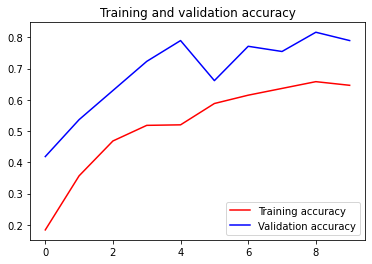

<Figure size 432x288 with 0 Axes>

In [20]:
# Plot the training and testing accuracies for each epoch

acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
loss = history.history['loss']
test_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, test_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()